<a href="https://colab.research.google.com/github/M-Sparsh-Mehra/Precipitation-Binary-Classification-ML/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**


---



In [ ]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_auc_score, f1_score,classification_report

# **Data Preprocessing**
---

## EDA

Historical weather data of Mizoram was taken for the problem.

In [ ]:
dataset=pd.read_excel('/content/weather_data_updated.xlsx')

In [ ]:
dataset.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Mawsynram,2022-06-01T00:00:00,21.9,21.9,20.9,94.06,0.0,0,rain,0,...,1005.0,5.1,6.6,0,0.0,0,10,Clear,clear-night,remote
1,Mawsynram,2022-06-01T01:00:00,21.8,21.8,20.6,92.90,0.0,0,NaN,0,...,1004.0,10.2,23.6,0,0.0,0,10,Clear,clear-night,remote
2,Mawsynram,2022-06-01T02:00:00,21.8,21.8,20.6,92.90,0.0,0,NaN,0,...,1004.0,49.0,24.1,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote
3,Mawsynram,2022-06-01T03:00:00,21.7,21.7,20.8,94.63,0.0,0,NaN,0,...,1004.0,33.4,23.6,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote
4,Mawsynram,2022-06-01T04:00:00,21.6,21.6,20.7,94.62,0.0,0,NaN,0,...,1004.0,20.3,23.6,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote


In [ ]:
dataset['preciptype'].replace(['rain'],[1], inplace=True)
dataset['preciptype'].fillna(0,inplace=True)

In [ ]:
dataset.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Mawsynram,2022-06-01T00:00:00,21.9,21.9,20.9,94.06,0.0,0,1.0,0,...,1005.0,5.1,6.6,0,0.0,0,10,Clear,clear-night,remote
1,Mawsynram,2022-06-01T01:00:00,21.8,21.8,20.6,92.90,0.0,0,0.0,0,...,1004.0,10.2,23.6,0,0.0,0,10,Clear,clear-night,remote
2,Mawsynram,2022-06-01T02:00:00,21.8,21.8,20.6,92.90,0.0,0,0.0,0,...,1004.0,49.0,24.1,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote
3,Mawsynram,2022-06-01T03:00:00,21.7,21.7,20.8,94.63,0.0,0,0.0,0,...,1004.0,33.4,23.6,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote
4,Mawsynram,2022-06-01T04:00:00,21.6,21.6,20.7,94.62,0.0,0,0.0,0,...,1004.0,20.3,23.6,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote


In [ ]:
dataset.drop(["feelslike","precipprob","precip","severerisk","conditions","icon","stations","snow","snowdepth","name"],axis=1,inplace=True)

Explanation: Some of these removed features are either irrelevant in predicting

rainfall or are actually dependent features that depends upon rain itself.

In [ ]:
dataset.head()

,datetime,temp,dew,humidity,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2022-06-01T00:00:00,21.9,20.9,94.06,1.0,5.0,6.5,26.1,1005.0,5.1,6.6,0,0.0,0
1,2022-06-01T01:00:00,21.8,20.6,92.90,0.0,4.7,5.4,30.3,1004.0,10.2,23.6,0,0.0,0
2,2022-06-01T02:00:00,21.8,20.6,92.90,0.0,4.0,4.7,43.7,1004.0,49.0,24.1,0,0.0,0
3,2022-06-01T03:00:00,21.7,20.8,94.63,0.0,4.0,4.7,48.9,1004.0,33.4,23.6,0,0.0,0
4,2022-06-01T04:00:00,21.6,20.7,94.62,0.0,4.0,4.3,42.0,1004.0,20.3,23.6,0,0.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          4416 non-null   object 
 1   temp              4416 non-null   float64
 2   dew               4416 non-null   float64
 3   humidity          4416 non-null   float64
 4   preciptype        4416 non-null   float64
 5   windgust          4416 non-null   float64
 6   windspeed         4416 non-null   float64
 7   winddir           4416 non-null   float64
 8   sealevelpressure  4416 non-null   float64
 9   cloudcover        4416 non-null   float64
 10  visibility        4416 non-null   float64
 11  solarradiation    4416 non-null   int64  
 12  solarenergy       4416 non-null   float64
 13  uvindex           4416 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 483.1+ KB


Only the preciptype feature have categorical data

1 for it rains that hour

0 for it does not rain that hour

Rest all the features are numeric

In [ ]:
dataset.isnull().sum()

datetime            0
temp                0
dew                 0
humidity            0
preciptype          0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
dtype: int64

No null values in any of the feature column

In [ ]:
dataset.duplicated().sum()

0

No duplicate rows present in the dataset.

In [ ]:
dataset['preciptype'].value_counts()

1.0    2242
0.0    2174
Name: preciptype, dtype: int64

Data is balanced with ratio 1.03

In [ ]:
dataset.describe()

,temp,dew,humidity,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
count,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,24.137523,21.892935,88.264998,0.507699,5.360100,4.718252,142.395924,1005.676132,81.986187,8.007156,203.641078,0.732858,2.019928
std,2.836866,1.855630,11.534151,0.499997,2.905519,3.323979,104.893585,2.957021,27.087688,9.334155,295.264606,1.062498,2.990443
min,17.100000,13.000000,33.430000,0.000000,0.400000,0.000000,0.100000,993.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.100000,21.000000,83.570000,0.000000,3.600000,2.500000,51.600000,1004.000000,77.500000,1.300000,0.000000,0.000000,0.000000
50%,23.400000,21.900000,92.630000,1.000000,4.700000,4.300000,122.000000,1006.000000,95.350000,3.300000,16.000000,0.100000,0.000000
75%,26.100000,22.900000,96.420000,1.000000,6.500000,6.100000,210.000000,1008.000000,100.000000,17.300000,368.250000,1.300000,4.000000
max,35.300000,29.100000,100.000000,1.000000,22.700000,37.100000,360.000000,1015.000000,100.000000,24.100000,1009.000000,3.600000,10.000000


Histogram for features distribution

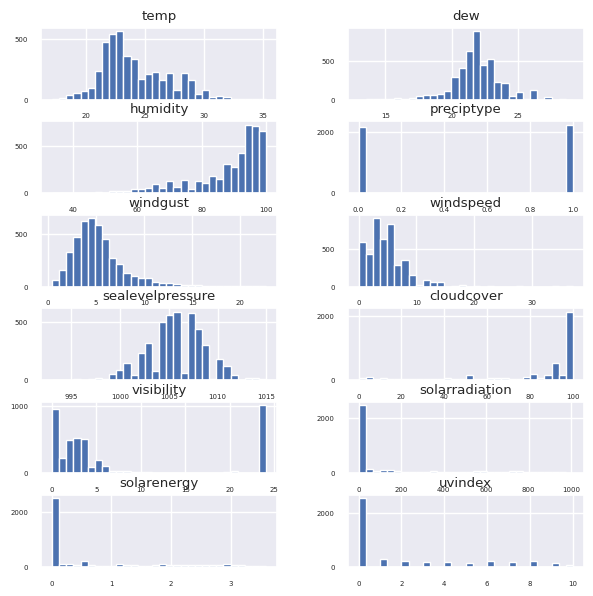

In [ ]:
dataset.hist(figsize=(7,7),bins=30,layout=(6,2),ylabelsize=5,xlabelsize=5,column=["temp","dew","humidity","preciptype","windgust","windspeed","sealevelpressure","cloudcover","visibility","solarradiation","solarenergy","uvindex",])
sns.set(font_scale=0.8)

## **Features Selection**

Separating dataset into independent(X) and dependent(y) features



In [ ]:
Y=dataset.iloc[:,4:5]
X=dataset.iloc[:,1:].drop(['preciptype'],axis=1)

### Data Exploration





Distribution of independent features with target feature

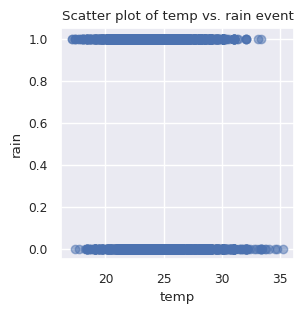

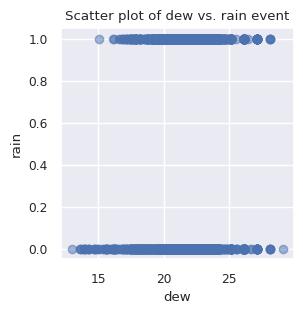

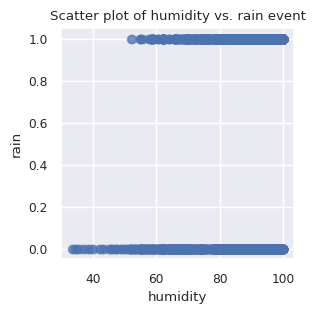

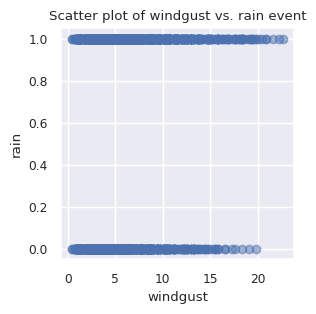

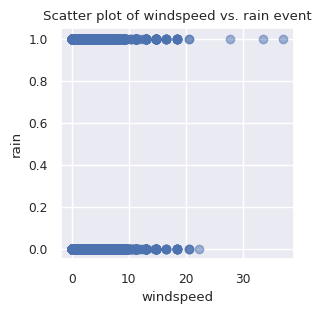

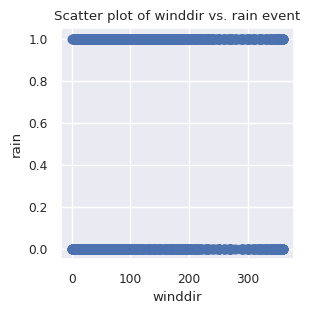

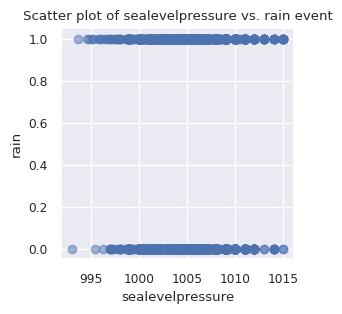

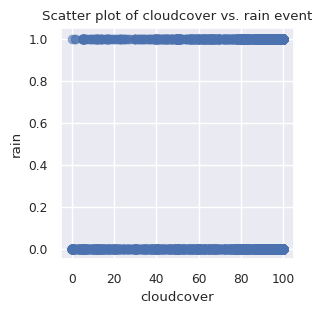

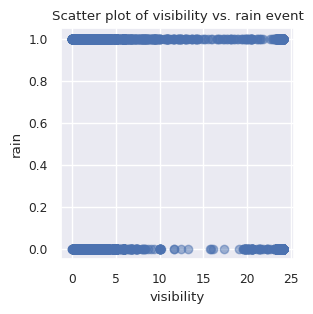

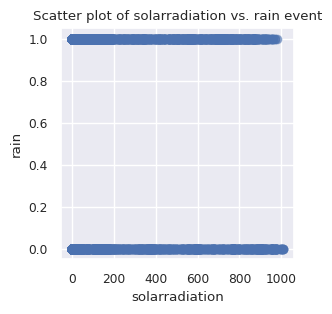

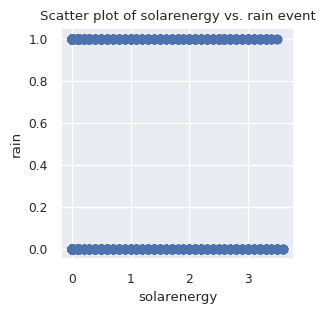

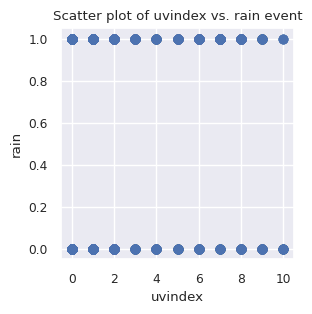

In [ ]:
for feature in X.columns:
    # Scatter plot
    mp.figure(figsize=(3, 3))
   # mp.subplot(1, 2, 1)
    mp.scatter(X[feature], Y, alpha=0.5)
    mp.xlabel(feature)
    mp.ylabel('rain')
    mp.title(f'Scatter plot of {feature} vs. rain event')
    mp.show()

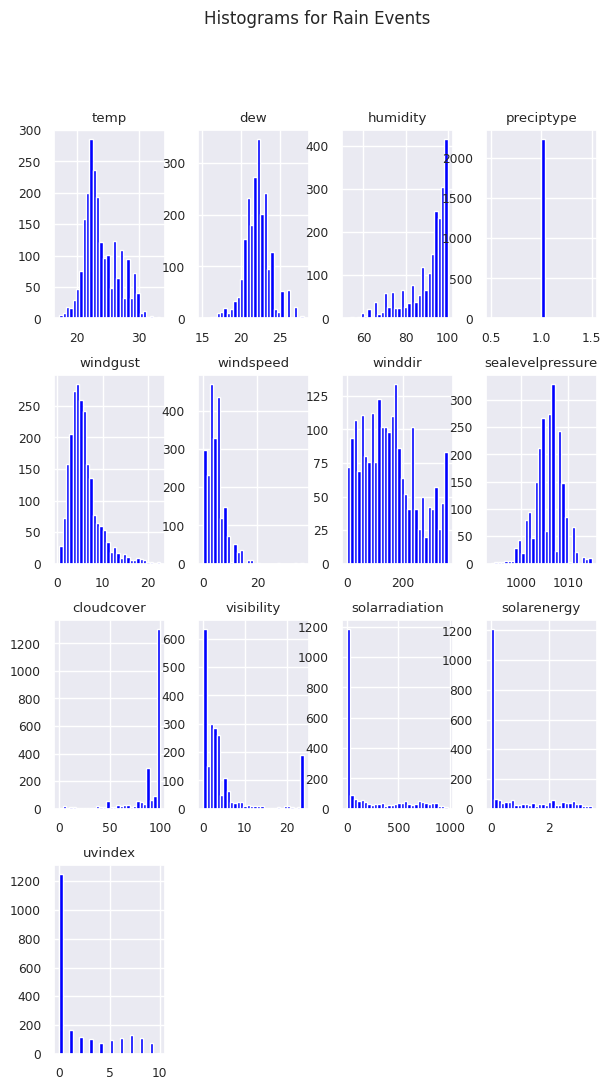

In [ ]:
rain_data = dataset[dataset["preciptype"]==1]
no_rain_data = dataset[dataset["preciptype"]==0]

#histograms for each feature in the rain event data
rain_data.hist(figsize=(7, 12), bins=30, color='blue')
mp.suptitle("Histograms for Rain Events", fontsize=12)
mp.show()

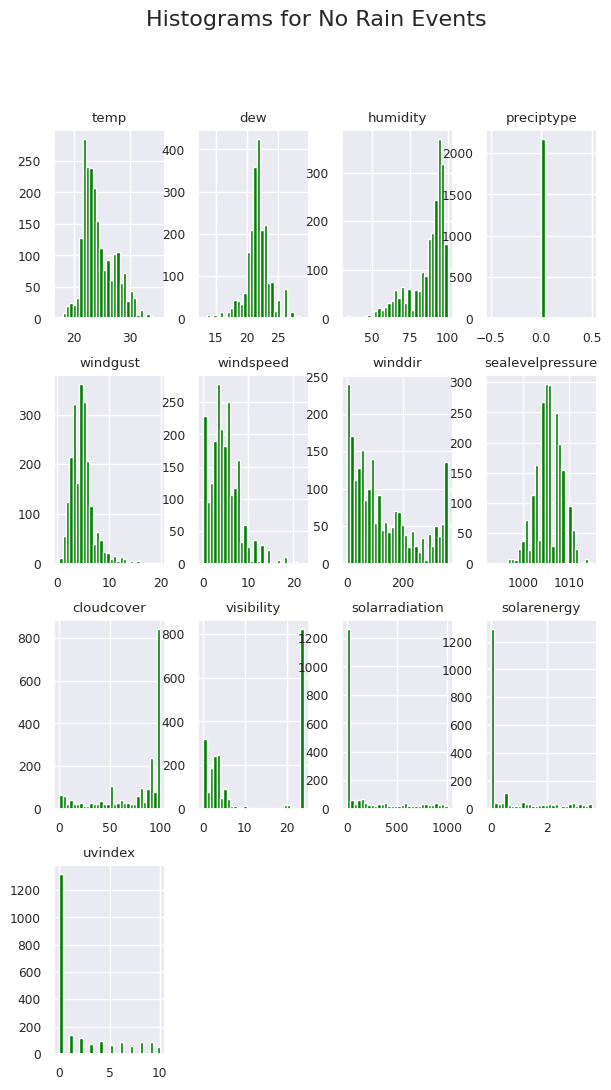

In [ ]:
#histograms for each feature in the no-rain event data
no_rain_data.hist(figsize=(7, 12), bins=30, color='green')
mp.suptitle("Histograms for No Rain Events", fontsize=16)
mp.show()

### Looking For correlations between independent features

In [ ]:
X.corr()

,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
temp,1.000000,0.496520,-0.770508,0.084649,0.457584,0.181545,-0.126027,-0.192255,0.193832,0.570288,0.570388,0.569353
dew,0.496520,1.000000,0.159417,-0.060830,0.122755,0.108142,-0.190376,0.152392,-0.043970,0.057364,0.057066,0.058386
humidity,-0.770508,0.159417,1.000000,-0.120905,-0.430724,-0.134095,0.003264,0.337716,-0.264227,-0.620916,-0.621272,-0.619176
windgust,0.084649,-0.060830,-0.120905,1.000000,0.304271,-0.009266,-0.085865,0.068581,-0.189674,0.122431,0.121895,0.121608
windspeed,0.457584,0.122755,-0.430724,0.304271,1.000000,0.043455,0.134412,-0.065766,0.084916,0.312094,0.312481,0.312292
winddir,0.181545,0.108142,-0.134095,-0.009266,0.043455,1.000000,-0.026176,0.038429,-0.054820,0.232658,0.232771,0.230619
sealevelpressure,-0.126027,-0.190376,0.003264,-0.085865,0.134412,-0.026176,1.000000,0.124226,-0.138753,0.086093,0.086078,0.086678
cloudcover,-0.192255,0.152392,0.337716,0.068581,-0.065766,0.038429,0.124226,1.000000,-0.396626,-0.105167,-0.105701,-0.105771
visibility,0.193832,-0.043970,-0.264227,-0.189674,0.084916,-0.054820,-0.138753,-0.396626,1.000000,-0.011546,-0.011061,-0.014141
solarradiation,0.570288,0.057364,-0.620916,0.122431,0.312094,0.232658,0.086093,-0.105167,-0.011546,1.000000,0.999790,0.997333


<Axes: >

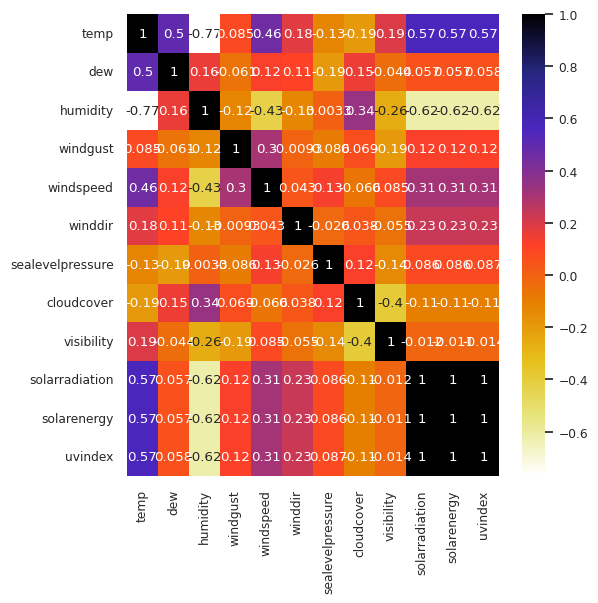

In [ ]:
mp.figure(figsize=(6,6))
sns.set (rc = {'figure.figsize':(6, 6)})
sns.set(font_scale=0.8)
sns.heatmap(X.corr(), annot=True, cmap=mp.cm.CMRmap_r)

1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2. A value closer to 1 implies stronger positive correlation
3. A value closer to -1 implies a stronger negative correlation

Solar radiation, solar energy and uv index are exactly correlated parameters.

Thus, any of them can be used instead of all three to remove bias towards these

correlated features.

In [ ]:
X=X.drop(["solarenergy","uvindex"],axis=1)

### Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0,stratify=Y)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Embeeded Method

### L1 Regulation

In [ ]:
reg = LassoCV()
reg.fit(X_train, Y_train.values.ravel())

LassoCV()

In [ ]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,Y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.002102
Best score using built-in LassoCV: 0.174183


Text(0.5, 1.0, 'Feature importance using Lasso Model')

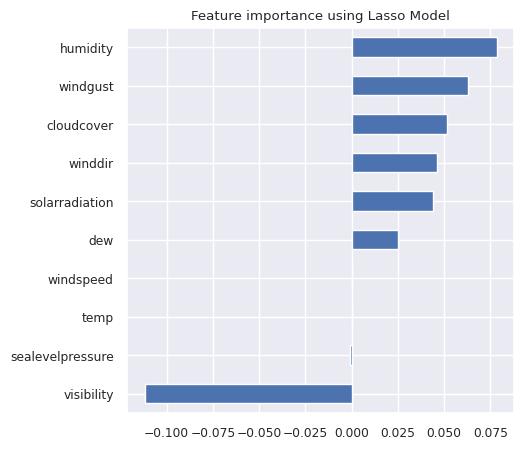

In [ ]:
imp_coef = coef.sort_values()
mp.rcParams['figure.figsize'] = (5.0, 5.0)
imp_coef.plot(kind = "barh")
mp.title("Feature importance using Lasso Model")

The Lasso model has eliminated Sealevel pressure and temp



RFE tree based

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=6)

X_rfe = rfe.fit_transform(X_train,Y_train.values.ravel())
#Fitting
model.fit(X_rfe,Y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True False  True False  True  True False]
[1 2 1 1 5 1 3 1 1 4]


In [ ]:
cols = list(X.columns)
t = pd.Series(rfe.support_,index = cols)
selected_features_rfe = t[t==True].index
removed_features_rfe = t[t==False].index
print("selected features::",selected_features_rfe)
print("potential invalid features::",removed_features_rfe)

selected features:: Index(['temp', 'humidity', 'windgust', 'winddir', 'cloudcover', 'visibility'], dtype='object')
potential invalid features:: Index(['dew', 'windspeed', 'sealevelpressure', 'solarradiation'], dtype='object')




---



---


**Conclusions:**
1. Solarradiation and windspeed was eliminated by both the method.
2. Temperature was eliminated by R1 but retained by RFE.
3. cloud cover was reatined by R1 whereas eliminated by RFE.
4. wind speed  and solar radiation were eliminated by both thus they can be removed.
---

---


Based on domain knowledge we will keep the feature cloud cover and temperature

eliminate the common rejected windspeed and solar radiation


###**Dropping features**

In [ ]:
print(X.columns)
X=X.drop(["windspeed","solarradiation"],axis=1)

Index(['temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation'],
      dtype='object')


In [ ]:
print(X.columns)


Index(['temp', 'dew', 'humidity', 'windgust', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility'],
      dtype='object')


# **Model Training**

---
We will be using the following Machine Learning models:
1. Logistic Regression
2. SVM
3. KNN
4. Gaussian Naive Bayes
5. Random Forest
6. Gradient Boost
---

## Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=0)

## Standarad Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()

classifier.fit(X_train, Y_train.values.ravel())
y_pred= classifier.predict(X_test)
#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Acurracy ",accuracy_score(Y_test, y_pred)*100)

[[311 219]
 [151 423]]
Acurracy  66.48550724637681


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.59      0.63       530
         1.0       0.66      0.74      0.70       574

    accuracy                           0.66      1104
   macro avg       0.67      0.66      0.66      1104
weighted avg       0.67      0.66      0.66      1104



<Axes: >

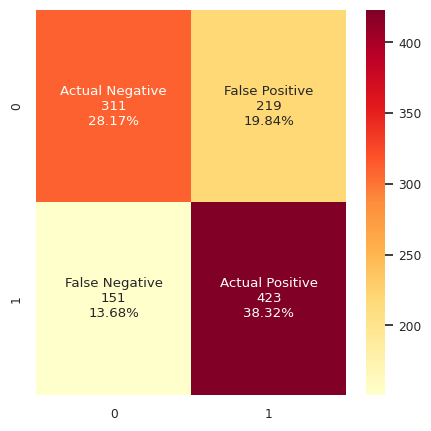

In [ ]:
group_names = ['Actual Negative','False Positive','False Negative','Actual Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlOrRd')

## **2. SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'rbf', random_state =0)

classifier.fit(X_train, Y_train.values.ravel())
y_pred= classifier.predict(X_test)
#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Acurracy ",accuracy_score(Y_test, y_pred)*100)


[[332 198]
 [136 438]]
Acurracy  69.7463768115942


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67       530
         1.0       0.69      0.76      0.72       574

    accuracy                           0.70      1104
   macro avg       0.70      0.69      0.69      1104
weighted avg       0.70      0.70      0.70      1104



<Axes: >

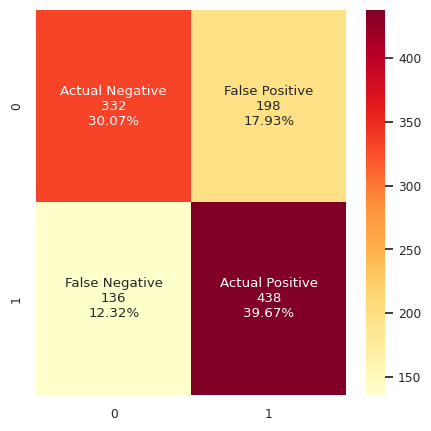

In [ ]:
group_names = ['Actual Negative','False Positive','False Negative','Actual Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlOrRd')

## **3. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

classifier.fit(X_train, Y_train.values.ravel())
y_pred= classifier.predict(X_test)
#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Acurracy ",accuracy_score(Y_test, y_pred)*100)

[[367 163]
 [182 392]]
Acurracy  68.75


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68       530
         1.0       0.71      0.68      0.69       574

    accuracy                           0.69      1104
   macro avg       0.69      0.69      0.69      1104
weighted avg       0.69      0.69      0.69      1104



<Axes: >

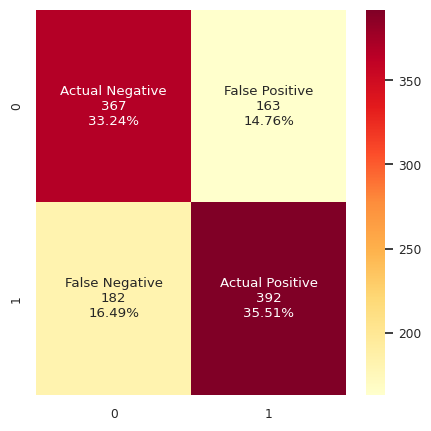

In [ ]:
group_names = ['Actual Negative','False Positive','False Negative','Actual Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlOrRd')

## **4- Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train.values.ravel())
y_pred= classifier.predict(X_test)
#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Acurracy ",accuracy_score(Y_test, y_pred)*100)

[[279 251]
 [126 448]]
Acurracy  65.85144927536231


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.53      0.60       530
         1.0       0.64      0.78      0.70       574

    accuracy                           0.66      1104
   macro avg       0.66      0.65      0.65      1104
weighted avg       0.66      0.66      0.65      1104



<Axes: >

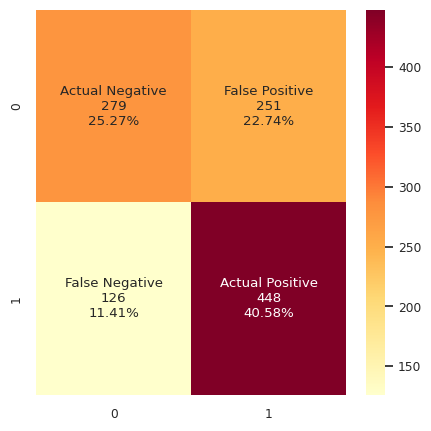

In [ ]:
group_names = ['Actual Negative','False Positive','False Negative','Actual Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlOrRd')

## **5. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train.values.ravel())
y_pred= classifier.predict(X_test)
#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Acurracy ",accuracy_score(Y_test, y_pred)*100)

[[399 131]
 [162 412]]
Acurracy  73.46014492753623


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       530
         1.0       0.76      0.72      0.74       574

    accuracy                           0.73      1104
   macro avg       0.73      0.74      0.73      1104
weighted avg       0.74      0.73      0.73      1104



<Axes: >

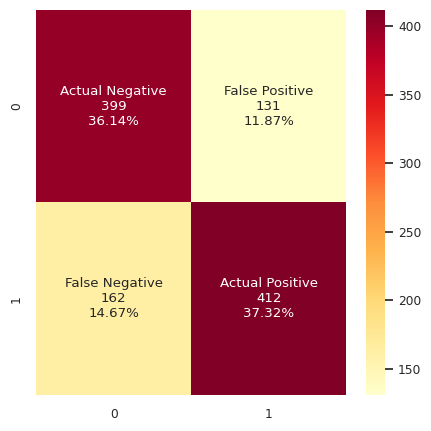

In [ ]:
group_names = ['Actual Negative','False Positive','False Negative','Actual Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlOrRd')

##**6- Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
               max_depth=5, random_state=0).fit(X_train, Y_train.values.ravel())
y_pred= classifier.predict(X_test)
#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Acurracy ",accuracy_score(Y_test, y_pred)*100)

[[378 152]
 [157 417]]
Acurracy  72.01086956521739


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       530
         1.0       0.73      0.73      0.73       574

    accuracy                           0.72      1104
   macro avg       0.72      0.72      0.72      1104
weighted avg       0.72      0.72      0.72      1104



<Axes: >

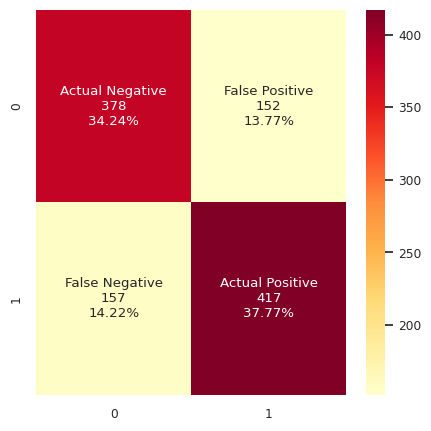

In [ ]:
group_names = ['Actual Negative','False Positive','False Negative','Actual Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlOrRd')

# **Hyperparameter Tuning**

---
 **Random Forest and Gradient Boost are 2 Best performing models**
---
So now we can do hyperparameter tuning on these two models to  enhance their

performance

## **1-Random Forest**

### **Randomized Search**

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [int(x)  for x in range(10,100,1)],
    'max_depth': [int(x)  for x in range(5,100,2)],
    'min_samples_split': [int(x) for x in range(2,40,2)],
    'min_samples_leaf': [int(x) for x in range(2,40,2)],
    'max_features': ['auto','sqrt','log2'],
    'criterion':['entropy','gini']
}

rf_classifier = RandomForestClassifier(random_state=0)

grid= RandomizedSearchCV(rf_classifier, param_grid, n_iter=100, cv=3, scoring='accuracy')
r=grid.fit(X_train, Y_train.values.ravel())

#the best parameters and score
best_params = r.best_params_
best_score = r.best_score_

In [ ]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 11, 'min_samples_split': 32, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 97, 'criterion': 'entropy'}
Best Score: 0.7290715372907153


#### **Performance of model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

optimized_rf_model = RandomForestClassifier(**best_params, random_state=0)
optimized_rf_model.fit(X_train, Y_train.values.ravel())
y_pred= optimized_rf_model.predict(X_test)
#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Acurracy ",accuracy_score(Y_test, y_pred)*100)

[[142  66]
 [ 83 147]]
Acurracy  65.98173515981736


Accuracy of the model is increased!!

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66       208
           1       0.69      0.64      0.66       230

    accuracy                           0.66       438
   macro avg       0.66      0.66      0.66       438
weighted avg       0.66      0.66      0.66       438



<Axes: >

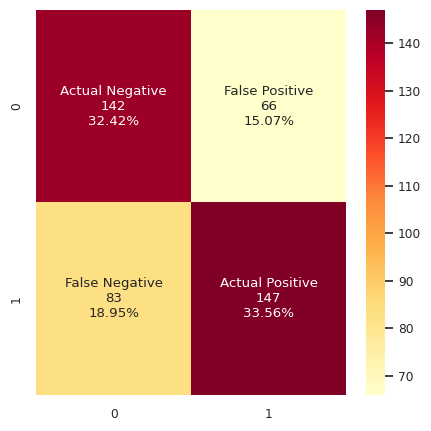

In [ ]:
group_names = ['Actual Negative','False Positive','False Negative','Actual Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlOrRd')